must be on branch https://github.com/AllenInstitute/visual_behavior_analysis/tree/sdk_validation_updates

In [1]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import visual_behavior.database as db

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import visual_behavior.data_access.loading as loading
import visual_behavior.validation.sdk as sdk_validation

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## get experiment table

In [3]:
experiment_table = loading.get_filtered_ophys_experiment_table().reset_index()

In [4]:
exp_info = experiment_table[["behavior_session_id","ophys_session_id","session_type", "equipment_name", "date_of_acquisition"]].drop_duplicates()
exp_info

,behavior_session_id,ophys_session_id,session_type,equipment_name,date_of_acquisition
0,951520319,951410079,OPHYS_1_images_A,MESO.1,2019-09-20 09:45:29.897856
8,952554548,952430817,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573
12,953982960,954954402,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000
20,956010809,955775716,OPHYS_3_images_A,MESO.1,2019-09-26 08:44:37.199778
24,957032492,957020350,OPHYS_4_images_B,MESO.1,2019-09-27 08:28:05.415005
...,...,...,...,...,...
1279,911904717,911719666,OPHYS_3_images_A,MESO.1,2019-07-25 08:00:28.100055
1282,913673477,913564409,OPHYS_4_images_B,MESO.1,2019-07-29 08:03:11.994563
1287,914211263,914161594,OPHYS_5_images_B_passive,MESO.1,2019-07-30 08:09:37.000000
1291,914705301,914639324,OPHYS_3_images_A,MESO.1,2019-07-31 08:56:17.109568


In [5]:
id_types = exp_info[["behavior_session_id", "ophys_session_id"]].drop_duplicates().reset_index(drop=True)
id_types

,behavior_session_id,ophys_session_id
0,951520319,951410079
1,952554548,952430817
2,953982960,954954402
3,956010809,955775716
4,957032492,957020350
...,...,...
555,911904717,911719666
556,913673477,913564409
557,914211263,914161594
558,914705301,914639324


## get behavior session table with SDK failures appended

In [6]:
behavior_session_table = sdk_validation.get_behavior_session_table()
behavior_session_table.sample(10)

Getting behavior-only session data. This might take a while...


,ophys_session_id,equipment_name,date_of_acquisition,donor_id,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,foraging_id,session_type,donor_in_ophys,project_id,project_code,in_filtered_experiments,average_projection,cell_specimen_table,corrected_fluorescence_traces,dff_traces,eye_tracking,licks,max_projection,metadata,motion_correction,ophys_timestamps,rewards,running_data_df,running_speed,segmentation_mask_image,stimulus_presentations,stimulus_templates,stimulus_timestamps,task_parameters,trials,is_ophys,timestamp
behavior_session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
864125430,NaN,BEH.G-Box4,2019-05-07 12:32:19.761,837581576,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,451787,[Ai93(TITL-GCaMP6f)],"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,97.0,b2ea9444-0ca5-4ad5-a9b6-37b00f4bc2be,TRAINING_4_images_A_training,True,844767092,VisualBehaviorMultiscope,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,2020-04-12 13:09:01.573673
834602121,NaN,BEH.F,2019-03-08 10:03:34.898,814111925,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,442709,[Ai94(TITL-GCaMP6s)],"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,77.0,8d3d4b74-69cd-41f9-b5fc-030278382585,TRAINING_1_gratings,True,767756009,VisualBehavior,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,2020-11-20 15:04:52.684542
818758572,NaN,BEH.G,2019-02-05 14:09:52.115,791756316,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,429952,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],M,116.0,ed37080f-68dd-45e9-9f3d-7c9a61d97f91,TRAINING_3_images_A_10uL_reward,True,767756009,VisualBehavior,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,2020-05-05 12:52:45.163720
919634924,NaN,BEH.F-Box3,2019-08-08 09:34:53.872,840355560,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453988,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],M,181.0,1201e5b5-feb5-4f53-bbae-b02b478f3530,TRAINING_5_images_A_handoff_ready,True,844767092,VisualBehaviorMultiscope,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,2020-05-05 17:05:08.467399
933954899,NaN,BEH.G-Box4,2019-08-28 12:05:43.919,847864085,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,457766,[Ai94(TITL-GCaMP6s)],"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,183.0,3c2675b3-bdb7-4a13-8142-cc18ad1c69dc,TRAINING_5_images_A_handoff_lapsed,True,767756009,VisualBehavior,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,2020-04-10 15:21:21.254924
1054088461,NaN,MESO.1,2020-10-01 13:53:30.548,1028194408,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],F,176.0,552aa402-1927-4a52-b601-1b551c02f102,OPHYS_4_images_B,True,844767092,VisualBehaviorMultiscope,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,2020-10-30 01:45:14.986072
884776271,NaN,BEH.D-Box6,2019-06-11 11:54:52.865,854612256,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459773,[Ai93(TITL-GCaMP6f)],"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,95.0,4160dff9-2a66-4648-a2a5-c427729b7b45,TRAINING_5_images_A_handoff_ready,True,767756009,VisualBehavior,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,2020-05-05 16:43:10.680330
1036833803,NaN,CAM2P.3,2020-07-17 09:12:34.458,1009380968,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,512458,[Ai93(TITL-GCaMP6f)],"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,200.0,6f075be6-b0fd-44d1-b5f4-7e206db1c196,OPHYS_0_images_B_habituation,True,873094517,VisualBehaviorTask1B,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,2020-11-03 17:35:04.501905
983295418,NaN,BEH.F-Box1,2019-11-15 09:25:42.381,935565377,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,485152,[Ai93(TITL-GCaMP6f)],"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,127.0,dadc4eba-9386-4d9b-b938-4448409119fe,TRAINING_5_images_A_handoff_lapsed,True,844767092,VisualBehaviorMultiscope,True,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN

## build error df

In [11]:
%%time
error_df = sdk_validation.build_error_df(behavior_session_table.query('is_ophys == 1'))

CPU times: user 149 ms, sys: 282 ms, total: 432 ms
Wall time: 920 ms


In [12]:
def cleanup_string(string):
    new_string = string[8:-2]
    return new_string

error_df["error_class"] = error_df["error_class"].apply(cleanup_string)
error_df = error_df.drop(columns="index")

In [13]:
error_df.query('sdk_version == "2.6.0"')

,timestamp,sdk_version,python_version,platform,behavior_session_id,failed_attribute,error_class,traceback
0,2021-02-10 23:53:55.953025,2.6.0,3.7.9,Linux-5.0.0-37-generic-x86_64-with-debian-bust...,951520319,licks,ValueError,"Traceback (most recent call last):\n File ""/a..."
1,2021-02-10 23:54:06.335294,2.6.0,3.7.9,Linux-5.0.0-37-generic-x86_64-with-debian-bust...,951520319,rewards,ValueError,"Traceback (most recent call last):\n File ""/a..."
2,2021-02-10 23:54:26.051008,2.6.0,3.7.9,Linux-5.0.0-37-generic-x86_64-with-debian-bust...,951520319,trials,ValueError,"Traceback (most recent call last):\n File ""/a..."


In [6]:
def traceback_end(string):
    new_string = string.partition(": ")[2]
    return new_string

error_df["traceback_end"] = error_df["traceback"].apply(traceback_end)

## look at some specific examples

In [122]:
print(error_df.iloc[1]['traceback'])

Traceback (most recent call last):
  File "/home/dougo/code/visual_behavior_analysis/visual_behavior/validation/sdk.py", line 74, in validate_attribute
    getattr(session, attribute)
  File "/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_session.py", line 431, in eye_tracking
    self._eye_tracking = self.api.get_eye_tracking(z_threshold=self._eye_tracking_z_threshold,
  File "/home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py", line 346, in get_eye_tracking
    eye_tracking_data = process_eye_tracking_data(eye_tracking_data,
  File "/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/eye_tracking_processing.py", line 193, in process_eye_tracking_data
    raise RuntimeError(f"Error! The number of sync file frame times "
RuntimeError: Error! The number of sync file frame times (135984 does not match the number of eye tracking frames (135977)!



In [123]:
print(error_df.iloc[5]['traceback'])

Traceback (most recent call last):
  File "/home/dougo/code/visual_behavior_analysis/visual_behavior/validation/sdk.py", line 111, in validate_attribute
    res = getattr(session, attribute)
  File "/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_session.py", line 239, in licks
    self._licks = self.api.get_licks()
  File "/home/dougo/Code/AllenSDK/allensdk/api/cache.py", line 75, in wrapper
    result = f(*args, **kwargs)
  File "/home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py", line 180, in get_licks
    rebase_function = self.get_stimulus_rebase_function()
  File "/home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py", line 268, in get_stimulus_rebase_function
    stimulus_rebase_function = get_stimulus_rebase_function(data, stimulus_timestamps_no_monitor_delay)
  File "/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/sync/__init__.py", line 288, in get_stimulus_rebase_function
    raise ValueError("Num

#### plotting aesthetics and save path

In [12]:
sns.set(context="notebook", style="whitegrid")

purples = sns.color_palette('RdPu_r', 6)[:5][::2]
greens = sns.color_palette('Greens_r', 6)[:5][::2]
blues = sns.color_palette('Blues_r', 6)[:5][::2]
rando = sns.color_palette('CMRmap_r', 12)
equipment_name_palette = purples + greens

blues

equipment_name_colors_dict = {'MESO.1': equipment_name_palette[0],
                              'MESO.2': equipment_name_palette[1],
                              'CAM2P.3': equipment_name_palette[3],
                              'CAM2P.4': equipment_name_palette[4],
                              'CAM2P.5':equipment_name_palette[5]}

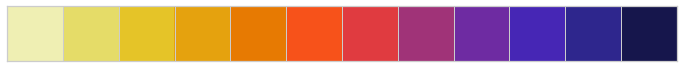

In [53]:
sns.palplot(rando)

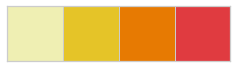

In [61]:
sns.palplot(rando[:8][::2])

In [1]:
sns.palplot(rando[3])

NameError: name 'sns' is not defined

In [13]:
save_path = r"\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\qc_plots\SDK_validation_errors"

Text(0.5, 1.0, 'SDK data loading errors by error class')

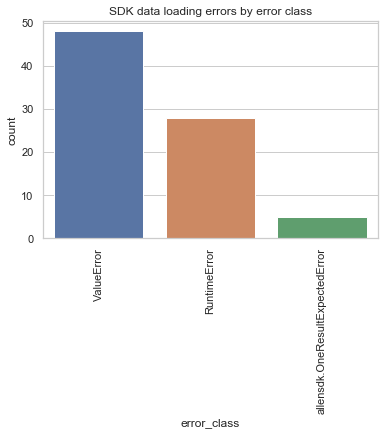

In [11]:
g= sns.countplot(x ='error_class', data = error_df, order = error_df['error_class'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("SDK data loading errors by error class")

# save_name = "SDK_loading_errors_by_error_class.png"
# plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

Text(0.5, 1.0, 'SDK data loading errors by failed attribute')

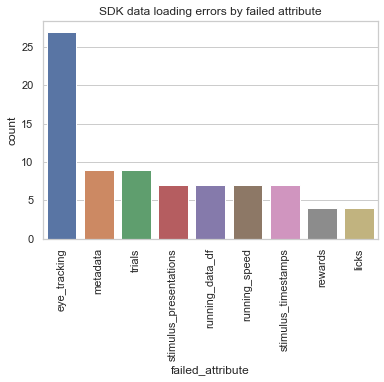

In [14]:
g= sns.countplot(x="failed_attribute", data = error_df, order = error_df['failed_attribute'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("SDK data loading errors by failed attribute")

# save_name = "SDK_loading_errors_by_failed_attribute.png"
# plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

Text(0.5, 1.0, 'SDK data loading errors by error class and failed attribute')

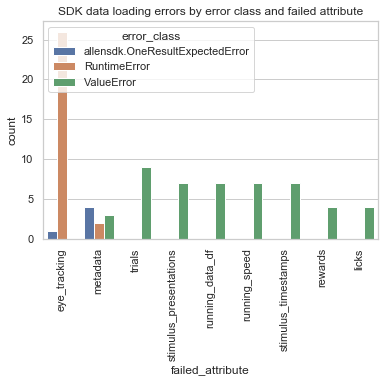

In [15]:
g= sns.countplot(x="failed_attribute", hue = "error_class", data = error_df,
                 order = error_df['failed_attribute'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("SDK data loading errors by error class and failed attribute")

# save_name = "SDK_loading_errors_by_error_class_and_failed_attribute.png"
# plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

## Eye Trackng Runtime Errors

In [77]:
eye_tracking_runtime = error_df.loc[(error_df["error_class"]=="RuntimeError") &(error_df["failed_attribute"]=="eye_tracking")].reset_index(drop=True)

In [78]:
eye_tracking_runtime

,timestamp,sdk_version,python_version,platform,behavior_session_id,failed_attribute,error_class,traceback
0,2020-11-20 15:00:27.062181,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1050651840,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
1,2020-11-20 15:00:27.710620,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,806109931,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
2,2020-11-20 15:00:28.607991,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,979414755,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
3,2020-11-20 15:01:07.154136,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
4,2020-11-20 15:01:23.448474,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,778166125,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
5,2020-11-20 15:01:09.463867,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,911035712,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
6,2020-11-20 15:01:10.275897,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,931566300,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
7,2020-11-20 15:01:22.591164,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,939537734,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
8,2020-11-20 15:01:30.997008,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,832981154,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."
9,2020-11-20 15:01:31.119492,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,783629024,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h..."


In [94]:
eye_tracking_runtime = pd.merge(eye_tracking_runtime, exp_info, how = "left", on = "behavior_session_id")
.

,timestamp,sdk_version,python_version,platform,behavior_session_id,failed_attribute,error_class,traceback,traceback_end,ophys_experiment_id,ophys_session_id,container_id,session_type,equipment_name,date_of_acquisition
0,2020-11-20 15:00:27.062181,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1050651840,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,1050730732,1050633071,1046279796,OPHYS_5_images_A_passive,CAM2P.4,2020-09-15 18:53:52.000000
1,2020-11-20 15:00:27.710620,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,806109931,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,806456687,805989030,803517529,OPHYS_1_images_A,CAM2P.4,2019-01-09 18:20:00.000000
2,2020-11-20 15:00:28.607991,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,979414755,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,979668410,979379271,975371413,OPHYS_3_images_B,CAM2P.3,2019-11-11 21:34:06.000000
3,2020-11-20 15:01:07.154136,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,1012771669,1012618881,1018027965,OPHYS_6_images_H,MESO.1,2020-03-05 11:30:19.493894
4,2020-11-20 15:01:07.154136,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,1012771667,1012618881,1018027962,OPHYS_6_images_H,MESO.1,2020-03-05 11:30:19.493894
5,2020-11-20 15:01:07.154136,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,1012771672,1012618881,1018027971,OPHYS_6_images_H,MESO.1,2020-03-05 11:30:19.493894
6,2020-11-20 15:01:07.154136,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,1012771678,1012618881,1018027981,OPHYS_6_images_H,MESO.1,2020-03-05 11:30:19.493894
7,2020-11-20 15:01:07.154136,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,1012771670,1012618881,1018027968,OPHYS_6_images_H,MESO.1,2020-03-05 11:30:19.493894
8,2020-11-20 15:01:07.154136,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (13...,1012771673,1012618881,1018027974,OPHYS_6_images_H,MESO.1,2020-03-05 11:30:19.493894
9,2020-11-20 15:01:23.448474,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,778166125,eye_tracking,RuntimeError,"Traceback (most recent call last):\n File ""/h...",Error! The number of sync file frame times (14...,778644591,778015591,782536745,OPHYS_2_images_A_passive,CAM2P.5,2018-11-13 17:52:17.000000


In [97]:
etr_exp_ids = eye_tracking_runtime["ophys_experiment_id"]
etr_exp_ids

1050730732

In [95]:
location =  r"\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\timestamps"
timestamps_input = "expriment_timestamps_numbers.csv"
timestamps_df = pd.read_csv(os.path.join(location,timestamps_input)).drop(columns=["Unnamed: 0"])
timestamps_df

,ophys_experiment_id,ophys_session_id,source,datastream,num_timestamps,diff_from_rawdata,mismatch_present
0,953659743,952430817,sync,behavior_mon,138249.0,0.0,False
1,953659743,952430817,VBA,behavior_mon,138263.0,14.0,True
2,953659743,952430817,avi,behavior_mon,138249.0,0.0,False
3,953659743,952430817,avi,eye_tracking,138263.0,0.0,False
4,953659743,952430817,SDK,eye_tracking,138263.0,0.0,False
...,...,...,...,...,...,...,...
29585,925843771,925478114,sync,running,270196.0,0.0,False
29586,925843771,925478114,sync,stim_photodiode,2258.0,NaN,NaN
29587,925843771,925478114,sync,stimulus,270196.0,0.0,False
29588,925843771,925478114,pkl,stimulus,270196.0,0.0,False


In [131]:
def pivot_experiment_timestamp_df(dataframe):
    dataframe["datastream_source"] = dataframe["datastream"] + "_" + dataframe["source"]
#     dataframe = dataframe.drop(columns=["ophys_session_id", "source", "datastream",
#                                         "num_timestamps", "mismatch_present"])
    dataframe = dataframe[["ophys_experiment_id", 'datastream_source', "diff_from_rawdata"]]
    pivot = dataframe.pivot(index="ophys_experiment_id", columns="datastream_source", values="diff_from_rawdata").reset_index().rename_axis(None, axis=1)
    return pivot

def identify_sync_line_mislabel(pivoted_dataframe):
    pivoted_dataframe["sync_line_mislabel"] = (pivoted_dataframe["behavior_mon_sync"] != 0) & (pivoted_dataframe["eye_tracking_sync"] != 0) & (pivoted_dataframe["behavior_mon_sync"] == -(pivoted_dataframe["eye_tracking_sync"]))
    return pivoted_dataframe

In [132]:
bloop = timestamps_df.loc[timestamps_df["ophys_experiment_id"].isin(etr_exp_ids)].reset_index(drop=True)
bloop = bloop.loc[bloop["datastream"].isin(["behavior_mon", "eye_tracking"])].reset_index(drop=True)
bloop = pivot_experiment_timestamp_df(bloop)
bloop = identify_sync_line_mislabel(bloop)
bloop

,ophys_experiment_id,behavior_mon_VBA,behavior_mon_avi,behavior_mon_sync,eye_tracking_SDK,eye_tracking_VBA,eye_tracking_avi,eye_tracking_sync,sync_line_mislabel
0,778644591,27.0,0.0,0.0,NaN,NaN,0.0,4.0,False
1,795953296,0.0,0.0,7.0,NaN,NaN,0.0,-4.0,False
2,806456687,0.0,0.0,5.0,NaN,NaN,0.0,-2.0,False
3,817267785,8.0,0.0,0.0,NaN,NaN,0.0,1.0,False
4,822641265,136125.0,0.0,0.0,NaN,NaN,0.0,5.0,False
5,833631914,0.0,0.0,20.0,NaN,NaN,0.0,-15.0,False
6,837296345,0.0,0.0,8.0,NaN,NaN,0.0,8.0,False
7,873968820,8.0,0.0,0.0,NaN,NaN,0.0,5.0,False
8,878363088,135125.0,0.0,0.0,NaN,NaN,0.0,7.0,False
9,882520593,27.0,0.0,0.0,NaN,NaN,0.0,3.0,False


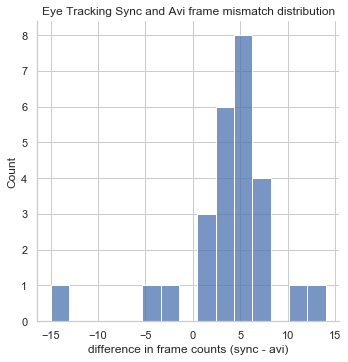

In [125]:
g = sns.displot(x="eye_tracking_sync", data = bloop)
g.set(xlabel='difference in frame counts (sync - avi)')
plt.title("Eye Tracking Sync and Avi frame mismatch distribution")

save_name = "Eye_tracking_runtime_error_frame_mismatch_distribution.png"
plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

In [16]:
g = sns.countplot(x="equipment_name", data = eye_tracking_runtime,
                  palette = equipment_name_colors_dict,
                  order = eye_tracking_runtime['equipment_name'].value_counts().index)

plt.title("Eye Tracking Runtime Error by rig")

# save_name = "Eye_tracking_runtime_error_by_rig.png"
# plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

NameError: name 'eye_tracking_runtime' is not defined

### Trials value error

In [145]:
len(error_df.loc[(error_df["error_class"]=="ValueError") &(error_df["failed_attribute"]=="trials")])

9

In [150]:
len(trials_value)

64

In [17]:
trials_value = error_df.loc[(error_df["error_class"]=="ValueError") &(error_df["failed_attribute"]=="trials")].reset_index(drop=True)
trials_value = pd.merge(trials_value, exp_info, how = "left", on = "behavior_session_id")
trials_value

,timestamp,sdk_version,python_version,platform,behavior_session_id,failed_attribute,error_class,traceback,traceback_end,ophys_session_id,session_type,equipment_name,date_of_acquisition
0,2020-11-20 15:01:24.699231,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",Number of stimulus timestamps in pickle file a...,1012618881,OPHYS_6_images_H,MESO.1,2020-03-05 11:30:19.493894
1,2020-11-20 15:01:33.564073,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,976964099,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",Number of stimulus timestamps in pickle file a...,976865980,OPHYS_3_images_G,MESO.1,2019-11-05 13:17:13.145749
2,2020-11-20 15:01:46.033035,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,951520319,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",Number of stimulus timestamps in pickle file a...,951410079,OPHYS_1_images_A,MESO.1,2019-09-20 09:45:29.897856
3,2020-11-20 15:02:15.275812,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,873813922,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",No photodiode events found. Please check the i...,873720614,OPHYS_5_images_B_passive,MESO.1,2019-05-22 13:10:18.000000
4,2020-11-20 15:06:17.027292,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,994017601,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n,994004373,OPHYS_5_images_H_passive,MESO.1,2019-12-12 14:56:23.132490
5,2020-11-20 15:06:03.545078,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1006441188,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...,1006424352,OPHYS_1_images_G,MESO.1,2020-02-11 13:55:33.130051
6,2020-11-20 15:06:01.276022,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,993241575,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n,993228542,OPHYS_1_images_G,MESO.1,2019-12-09 08:20:58.196330
7,2020-11-20 15:06:09.366995,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,945277725,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",Number of stimulus timestamps in pickle file a...,945124131,OPHYS_4_images_B,MESO.1,2019-09-12 14:38:17.192559
8,2020-11-20 15:06:16.325306,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,994174047,trials,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...,994136636,OPHYS_5_images_H_passive,MESO.1,2019-12-13 08:36:23.604445


Text(0.5, 1.0, 'Trials ValueError by rig')

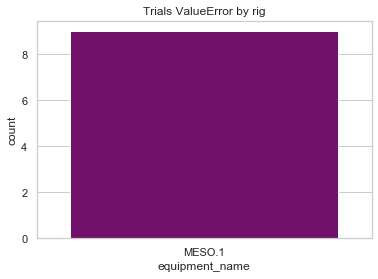

In [18]:
g = sns.countplot(x="equipment_name", data = trials_value,
                  palette = equipment_name_colors_dict,
                  order = trials_value['equipment_name'].value_counts().index)

plt.title("Trials ValueError by rig")

# save_name = "trials_value_error_by_rig.png"
# plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

In [185]:
error_df["traceback_end"]

,traceback_end
0,
1,Error! The number of sync file frame times (13...
2,Error! The number of sync file frame times (13...
3,Error! The number of sync file frame times (13...
4,Error! The number of sync file frame times (13...
5,Number of stimulus timestamps in pickle file a...
6,dff_frames (len=48161) is not equal to number ...
7,Number of stimulus timestamps in pickle file a...
8,Delay (-0.020597349477893455s) falls outside e...
9,Delay (-0.020597349477893455s) falls outside e...


In [176]:
print(error_df.iloc[9]['traceback'])

Traceback (most recent call last):
  File "/home/dougo/code/visual_behavior_analysis/visual_behavior/validation/sdk.py", line 224, in validate_attribute
    getattr(session, attribute)
  File "/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_session.py", line 196, in running_speed
    self._running_speed = self.api.get_running_speed()
  File "/home/dougo/Code/AllenSDK/allensdk/api/cache.py", line 75, in wrapper
    result = f(*args, **kwargs)
  File "/home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py", line 205, in get_running_speed
    running_data_df = self.get_running_data_df(lowpass=lowpass)
  File "/home/dougo/Code/AllenSDK/allensdk/api/cache.py", line 75, in wrapper
    result = f(*args, **kwargs)
  File "/home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py", line 198, in get_running_data_df
    stimulus_timestamps = self.get_stimulus_timestamps()
  File "/home/dougo/Code/AllenSDK/allensdk/api/cache.py", line 75, in 

In [19]:
def label_common_errors(string):
    if "Delay (" in string:
        error_label = "monitor delay"
    elif "Can't find valid start event" in string:
        error_label = "can't find valid start event"
    elif "Error! The number of sync file frame times" in string:
        error_label = "timestamps: sync and eyetracking mismatch"
    elif "No photodiode events found. Please check the input data for errors" in string:
        error_label = "no photodiode events"
    elif "Number of stimulus timestamps in pickle file are not equal to timestamps in the sync file" in string:
        error_label = "timestamps: stimulus sync and pickle mismatch"
    elif "dff_frames" in string:
        error_label = "timestamps: dff length mismatch with split timestamps"
    elif "operands could not be broadcast together with shapes" in string:
        error_label ="operands shape"
    elif "{} results from query'.format(x)" in string:
        error_label = "lims query error"
    else:
        error_label = "1_off"
    return error_label

In [20]:
error_strings = error_df[["behavior_session_id", "failed_attribute", "error_class", "traceback", "traceback_end"]].sort_values(by = ["traceback_end"]).reset_index(drop=True)
error_strings["error_type"] = error_strings["traceback_end"].apply(lambda x: label_common_errors(x))
error_strings = pd.merge(error_strings, exp_info, how = "left", on = "behavior_session_id")
error_strings = error_strings[["behavior_session_id", "ophys_session_id", "failed_attribute", "error_type", "error_class","equipment_name", "session_type", "date_of_acquisition", "traceback", "traceback_end"]]
error_strings

,behavior_session_id,ophys_session_id,failed_attribute,error_type,error_class,equipment_name,session_type,date_of_acquisition,traceback,traceback_end
0,1037743363,1037717307,eye_tracking,1_off,allensdk.OneResultExpectedError,CAM2P.3,OPHYS_1_images_B,2020-07-21 18:21:37.000000,"Traceback (most recent call last):\n File ""/h...",
1,994017601,994004373,running_data_df,can't find valid start event,ValueError,MESO.1,OPHYS_5_images_H_passive,2019-12-12 14:56:23.132490,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
2,994017601,994004373,running_speed,can't find valid start event,ValueError,MESO.1,OPHYS_5_images_H_passive,2019-12-12 14:56:23.132490,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
3,994017601,994004373,stimulus_presentations,can't find valid start event,ValueError,MESO.1,OPHYS_5_images_H_passive,2019-12-12 14:56:23.132490,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
4,993241575,993228542,trials,can't find valid start event,ValueError,MESO.1,OPHYS_1_images_G,2019-12-09 08:20:58.196330,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
5,993241575,993228542,stimulus_timestamps,can't find valid start event,ValueError,MESO.1,OPHYS_1_images_G,2019-12-09 08:20:58.196330,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
6,993241575,993228542,stimulus_presentations,can't find valid start event,ValueError,MESO.1,OPHYS_1_images_G,2019-12-09 08:20:58.196330,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
7,993241575,993228542,running_speed,can't find valid start event,ValueError,MESO.1,OPHYS_1_images_G,2019-12-09 08:20:58.196330,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
8,994017601,994004373,stimulus_timestamps,can't find valid start event,ValueError,MESO.1,OPHYS_5_images_H_passive,2019-12-12 14:56:23.132490,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
9,994017601,994004373,trials,can't find valid start event,ValueError,MESO.1,OPHYS_5_images_H_passive,2019-12-12 14:56:23.132490,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n


In [133]:
error_strings["error_type"].unique()

array(['1_off', "can't find valid start event", 'monitor delay',
       'timestamps: sync and eyetracking mismatch',
       'no photodiode events',
       'timestamps: stimulus sync and pickle mismatch',
       'timestamps: dff length mismatch with split timestamps',
       'operands shape', 'lims query error'], dtype=object)

In [29]:
error_type = 'monitor delay'
error_type_df = error_strings.loc[error_strings["error_type"]==error_type].reset_index(drop=True)
error_type_df

,behavior_session_id,ophys_session_id,failed_attribute,error_type,error_class,equipment_name,session_type,date_of_acquisition,traceback,traceback_end
0,1012667846,1012618881,stimulus_presentations,monitor delay,ValueError,MESO.1,OPHYS_6_images_H,2020-03-05 11:30:19.493894,"Traceback (most recent call last):\n File ""/h...",Delay (-0.020597349477893455s) falls outside e...
1,1012667846,1012618881,running_speed,monitor delay,ValueError,MESO.1,OPHYS_6_images_H,2020-03-05 11:30:19.493894,"Traceback (most recent call last):\n File ""/h...",Delay (-0.020597349477893455s) falls outside e...
2,1012667846,1012618881,running_data_df,monitor delay,ValueError,MESO.1,OPHYS_6_images_H,2020-03-05 11:30:19.493894,"Traceback (most recent call last):\n File ""/h...",Delay (-0.020597349477893455s) falls outside e...
3,1012667846,1012618881,stimulus_timestamps,monitor delay,ValueError,MESO.1,OPHYS_6_images_H,2020-03-05 11:30:19.493894,"Traceback (most recent call last):\n File ""/h...",Delay (-0.020597349477893455s) falls outside e...


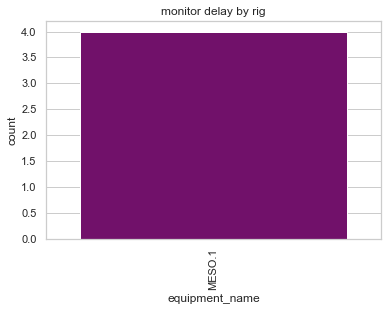

In [30]:
g = sns.countplot(x="equipment_name", data = error_type_df, 
                  palette = equipment_name_colors_dict, order = error_type_df["equipment_name"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("monitor delay by rig")
save_name = "monitor_delay_by_rig.png"
plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

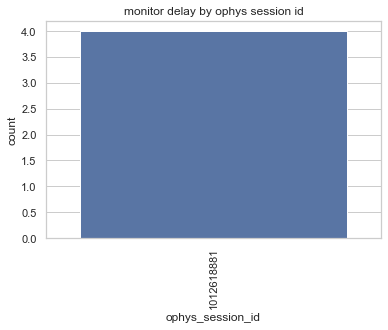

In [31]:
g = sns.countplot(x="ophys_session_id", data = error_type_df, order = error_type_df["ophys_session_id"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("monitor delay by ophys session id")
save_name = "monitor_delay_by_ophys_session.png"
plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

In [ ]:
g = sns.countplot(x="ophys_session_id", data = error_type_df, order = error_type_df["ophys_session_id"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("no photodiode events by ophys session id")
save_name = "no_photodiode_events_by_rig.png"
plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

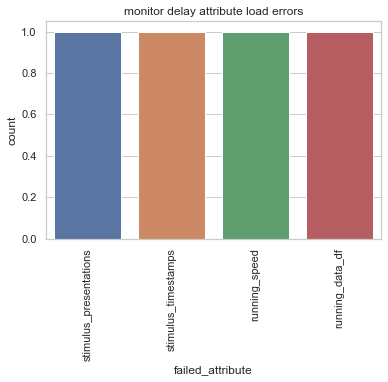

In [32]:
g = sns.countplot(x="failed_attribute", data = error_type_df, order = error_type_df["failed_attribute"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("monitor delay attribute load errors")
save_name = "monitor_delay_attribute_loading_errors.png"
plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

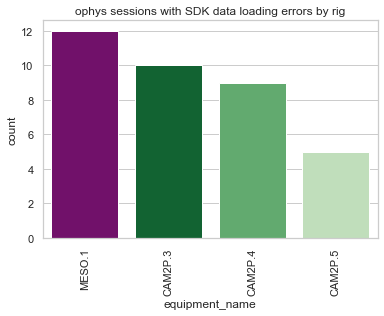

In [127]:
g = sns.countplot(x="equipment_name", data = error_by_session, 
                  palette = equipment_name_colors_dict, order = error_by_session["equipment_name"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("ophys sessions with SDK data loading errors by rig")
save_name = "number_sessions_with_SDK_load_errors_by_rig.png"
plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

In [105]:
g = sns.countplot(x="equipment_name", data = error_by_session, 
                  palette = equipment_name_colors_dict, order = error_by_session["equipment_name"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("ophys sessions with SDK data loading errors by rig")
# save_name = "number_sessions_with_SDK_load_errors_by_rig.png"
# plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

36

In [103]:
start_event = error_strings.loc[error_strings["error_type"]=="can't find valid start event"].sort_values(by=["failed_attribute"]).reset_index(drop=True)
start_event

,behavior_session_id,ophys_session_id,failed_attribute,error_type,error_class,traceback,traceback_end
0,993241575,993228542,metadata,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
1,994017601,994004373,running_data_df,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
2,993241575,993228542,running_data_df,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
3,994017601,994004373,running_speed,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
4,993241575,993228542,running_speed,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
5,994017601,994004373,stimulus_presentations,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
6,993241575,993228542,stimulus_presentations,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
7,993241575,993228542,stimulus_timestamps,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
8,994017601,994004373,stimulus_timestamps,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
9,993241575,993228542,trials,can't find valid start event,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n


In [106]:
start_event["ophys_session_id"].unique()

array([993228542, 994004373], dtype=int64)

In [92]:
operands = error_strings.loc[error_strings["error_type"]=="operands shape"].sort_values(by=["failed_attribute"]).reset_index(drop=True)
operands

,behavior_session_id,ophys_session_id,failed_attribute,error_type,error_class,traceback,traceback_end
0,994174047,994136636,metadata,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
1,1006441188,1006424352,running_data_df,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
2,994174047,994136636,running_data_df,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
3,945277725,945124131,running_data_df,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
4,1006441188,1006424352,running_speed,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
5,994174047,994136636,running_speed,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
6,945277725,945124131,running_speed,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
7,1006441188,1006424352,stimulus_presentations,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
8,994174047,994136636,stimulus_presentations,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
9,945277725,945124131,stimulus_presentations,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...


In [97]:
operands = operands.sort_values(by=["ophys_session_id"]).reset_index(drop=True)
operands

,behavior_session_id,ophys_session_id,failed_attribute,error_type,error_class,traceback,traceback_end
0,945277725,945124131,running_data_df,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
1,945277725,945124131,running_speed,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
2,945277725,945124131,stimulus_presentations,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
3,945277725,945124131,stimulus_timestamps,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
4,994174047,994136636,metadata,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
5,994174047,994136636,running_data_df,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
6,994174047,994136636,running_speed,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
7,994174047,994136636,stimulus_presentations,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
8,994174047,994136636,stimulus_timestamps,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
9,994174047,994136636,trials,operands shape,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...


In [98]:
operands["ophys_session_id"].unique()

array([ 945124131,  994136636, 1006424352], dtype=int64)

In [96]:
csv_save_path = r"\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\qc_plots\SDK_validation_errors"
csv_save_name = "operands_shape_loading_failures.csv"

operands.to_csv(os.path.join(csv_save_path, csv_save_name))

In [101]:
print(operands.iloc[4]['traceback'])

Traceback (most recent call last):
  File "/home/dougo/code/visual_behavior_analysis/visual_behavior/validation/sdk.py", line 224, in validate_attribute
    getattr(session, attribute)
  File "/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_session.py", line 148, in metadata
    self._metadata = self.api.get_metadata()
  File "/home/dougo/Code/AllenSDK/allensdk/api/cache.py", line 75, in wrapper
    result = f(*args, **kwargs)
  File "/home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py", line 172, in get_metadata
    metadata['stimulus_frame_rate'] = self.get_stimulus_frame_rate()
  File "/home/dougo/Code/AllenSDK/allensdk/api/cache.py", line 75, in wrapper
    result = f(*args, **kwargs)
  File "/home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py", line 157, in get_stimulus_frame_rate
    stimulus_timestamps = self.get_stimulus_timestamps()
  File "/home/dougo/Code/AllenSDK/allensdk/api/cache.py", line 75, in wrapper
   

[Text(0, 0, 'stimulus_timestamps'),
 Text(0, 0, 'running_speed'),
 Text(0, 0, 'stimulus_presentations'),
 Text(0, 0, 'running_data_df'),
 Text(0, 0, 'trials'),
 Text(0, 0, 'metadata')]

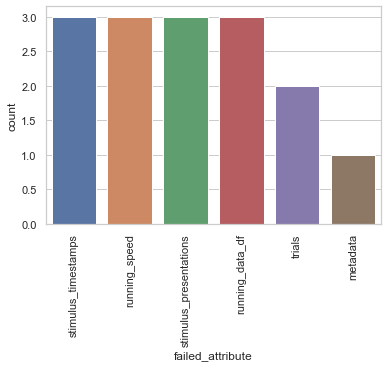

In [82]:
g= sns.countplot(x="failed_attribute", data = operands, order = operands['failed_attribute'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
# g.set_title("SDK data loading errors by error type")

# save_name = "SDK_loading_errors_by_error_type.png"
# plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

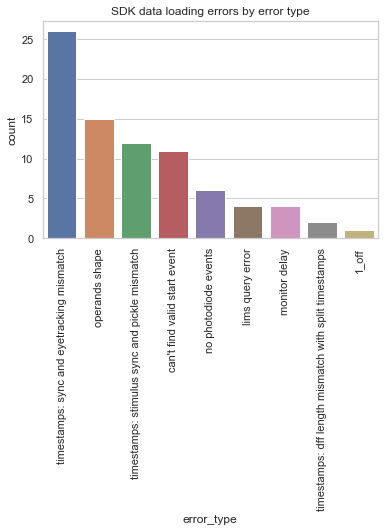

In [31]:
g= sns.countplot(x="error_type", data = error_strings, order = error_strings['error_type'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("SDK data loading errors by error type")

save_name = "SDK_loading_errors_by_error_type.png"
plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

Text(0.5, 1.0, 'SDK data loading errors by error type and failed attribute')

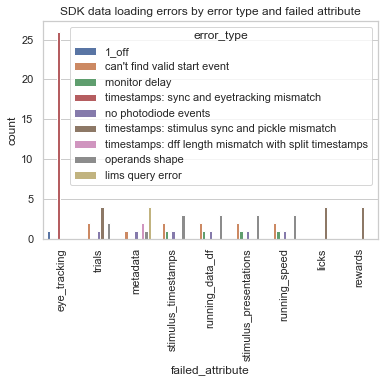

In [32]:
g= sns.countplot(x="failed_attribute", hue = "error_type", data = error_strings,
                 order = error_df['failed_attribute'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("SDK data loading errors by error type and failed attribute")

# save_name = "SDK_loading_errors_by_error_class_and_failed_attribute.png"
# plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")

Text(0.5, 1.0, 'SDK trials attribute data loading errors by error type')

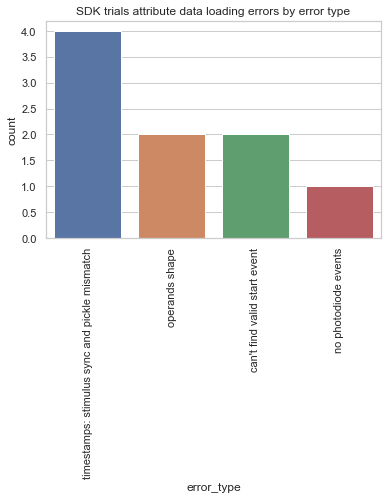

In [73]:
failed_attribute = "trials"
plot_df = error_strings.loc[error_strings["failed_attribute"]==failed_attribute]
g = sns.countplot(x="error_type", data = plot_df, order = plot_df["error_type"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("SDK " + failed_attribute + " attribute data loading errors by error type")

In [83]:
for failed_attribute in error_strings["failed_attribute"].unique():
    plot_df = error_strings.loc[error_strings["failed_attribute"]==failed_attribute]
    g = sns.countplot(x="error_type", data = plot_df, order = plot_df["error_type"].value_counts().index)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set_title("SDK " + failed_attribute + " attribute data loading errors by error type")
    save_name = failed_attribute+"_loading_error_by_error_type"
    plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")
    plt.clf()


<Figure size 432x288 with 0 Axes>

In [85]:
for error_type in error_strings["error_type"].unique():
    plot_df = error_strings.loc[error_strings["error_type"]==error_type]
    g = sns.countplot(x="failed_attribute", data = plot_df, order = plot_df["failed_attribute"].value_counts().index)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set_title(error_type +" by failed attribute loading")
    save_name = error_type+"_by_failed_attribute_loading"
    plt.savefig (os.path.join(save_path, save_name), bbox_inches = "tight")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [213]:
print(error_strings.iloc[12]['traceback_end'])

Delay (-0.020597349477893455s) falls outside expected value range (0-0.07s).



In [186]:
common_errors_dict["operands could not be broadcast together with shapes"]

'operands'

In [210]:
print(error_df.iloc[77]['traceback'])

Traceback (most recent call last):
  File "/home/dougo/code/visual_behavior_analysis/visual_behavior/validation/sdk.py", line 224, in validate_attribute
    getattr(session, attribute)
  File "/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_session.py", line 432, in eye_tracking
    dilation_frames=self._eye_tracking_dilation_frames)
  File "/home/dougo/Code/AllenSDK/allensdk/internal/api/behavior_ophys_api.py", line 371, in get_eye_tracking
    dilation_frames)
  File "/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/eye_tracking_processing.py", line 193, in process_eye_tracking_data
    raise RuntimeError(f"Error! The number of sync file frame times "
RuntimeError: Error! The number of sync file frame times (135918 does not match the number of eye tracking frames (135917)!



In [ ]:
error_df.loc[error_df["error"]]

In [164]:
common_errors_dict.keys()

dict_keys(['Number of stimulus timestamps in pickle file are not equal to timestamps in the sync file', 'No photodiode events found', "can't find valid start event", 'operands could not be broadcast together with shapes', '{} results from query'])

In [142]:
trials_value["traceback_end"]

0     Number of stimulus timestamps in pickle file a...
1     Number of stimulus timestamps in pickle file a...
2     Number of stimulus timestamps in pickle file a...
3     Number of stimulus timestamps in pickle file a...
4     Number of stimulus timestamps in pickle file a...
5     Number of stimulus timestamps in pickle file a...
6     Number of stimulus timestamps in pickle file a...
7     Number of stimulus timestamps in pickle file a...
8     Number of stimulus timestamps in pickle file a...
9     Number of stimulus timestamps in pickle file a...
10    Number of stimulus timestamps in pickle file a...
11    Number of stimulus timestamps in pickle file a...
12    Number of stimulus timestamps in pickle file a...
13    Number of stimulus timestamps in pickle file a...
14    Number of stimulus timestamps in pickle file a...
15    Number of stimulus timestamps in pickle file a...
16    Number of stimulus timestamps in pickle file a...
17    Number of stimulus timestamps in pickle fi

In [151]:
stim_pre_value = error_df.loc[(error_df["error_class"]=="ValueError") &(error_df["failed_attribute"]=="stimulus_presentations")].reset_index(drop=True)
stim_pre_value

,timestamp,sdk_version,python_version,platform,behavior_session_id,failed_attribute,error_class,traceback,traceback_end
0,2020-11-20 15:01:17.924034,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1012667846,stimulus_presentations,ValueError,"Traceback (most recent call last):\n File ""/h...",Delay (-0.020597349477893455s) falls outside e...
1,2020-11-20 15:01:50.291941,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,873813922,stimulus_presentations,ValueError,"Traceback (most recent call last):\n File ""/h...",No photodiode events found. Please check the i...
2,2020-11-20 15:05:48.820493,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,994017601,stimulus_presentations,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
3,2020-11-20 15:05:48.785243,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,1006441188,stimulus_presentations,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
4,2020-11-20 15:05:48.366113,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,993241575,stimulus_presentations,ValueError,"Traceback (most recent call last):\n File ""/h...",Can't find valid start event\n
5,2020-11-20 15:06:02.196476,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,945277725,stimulus_presentations,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...
6,2020-11-20 15:05:52.379684,2.3.2,3.7.9,Linux-3.10.0-514.26.2.el7.x86_64-x86_64-with-c...,994174047,stimulus_presentations,ValueError,"Traceback (most recent call last):\n File ""/h...",operands could not be broadcast together with ...


In [152]:
stim_pre_value["traceback_end"]

0    Delay (-0.020597349477893455s) falls outside e...
1    No photodiode events found. Please check the i...
2                       Can't find valid start event\n
3    operands could not be broadcast together with ...
4                       Can't find valid start event\n
5    operands could not be broadcast together with ...
6    operands could not be broadcast together with ...
Name: traceback_end, dtype: object

In [ ]:
print

In [ ]:
{"Delay": "Delay", "operands could not be broadcast_together_with"}

In [ ]:
stim_pre_value = error_df.loc[(error_df["error_class"]=="ValueError") &(error_df["failed_attribute"]=="stimulus_presentations")].reset_index(drop=True)
stim_pre_value = pd.merge(stim_pre_value, exp_info, how = "left", on = "behavior_session_id")
stim_pre_value